In [1]:
#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind')

#modules
import wrangle

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_org = wrangle.get_curriculum_data()
df_org.head()

Returning saved csv files.


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java


In [3]:
df_org.shape

(900223, 16)

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          900223 non-null  object 
 1   time          900223 non-null  object 
 2   path          900222 non-null  object 
 3   user_id       900223 non-null  int64  
 4   cohort_id     847330 non-null  float64
 5   ip            900223 non-null  object 
 6   id            847330 non-null  float64
 7   name          847330 non-null  object 
 8   slack         847330 non-null  object 
 9   start_date    847330 non-null  object 
 10  end_date      847330 non-null  object 
 11  created_at    847330 non-null  object 
 12  updated_at    847330 non-null  object 
 13  deleted_at    0 non-null       float64
 14  program_id    847330 non-null  float64
 15  program_name  900223 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 109.9+ MB


In [5]:
#convert columns to dates
df_org['date'] = pd.to_datetime(df_org['date'],format='%Y-%m-%d')
df_org['start_date'] = pd.to_datetime(df_org['start_date'],format='%Y-%m-%d')
df_org['end_date'] = pd.to_datetime(df_org['end_date'],format='%Y-%m-%d')

In [6]:
(df_org.user_id.value_counts() < 200).mean()

0.2640163098878695

##### Basic Date info

In [7]:
print(f'The starting date is {df_org.date.min()}\nThe ending date is {df_org.date.max()}')

The starting date is 2018-01-26 00:00:00
The ending date is 2021-04-21 00:00:00


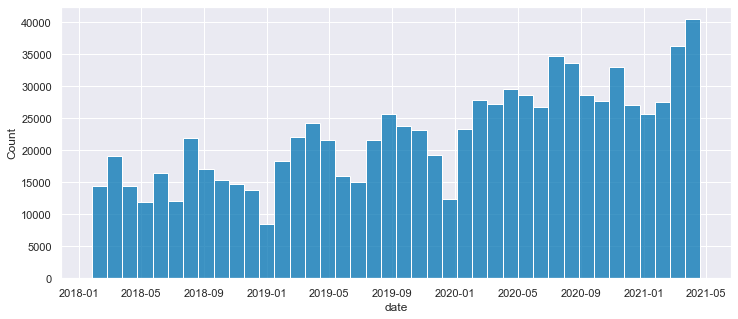

In [8]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_org,x='date',bins=40); #40 bins b/c ~40 months

### Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [9]:
#Filter dataset down to just those that access it after graduation
df = df_org[df_org.date > df_org.end_date]

In [10]:
df.shape

(199834, 16)

In [11]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
30,2018-01-26,10:14:47,/,11,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php


In [12]:
#create days post grad column
df['days_post_grad'] = (df['date'] - df['end_date']).astype('timedelta64[D]')

/var/folders/dn/dr6y15951wq03xbh2xr9khq40000gn/T/ipykernel_22537/3992121552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_post_grad'] = (df['date'] - df['end_date']).astype('timedelta64[D]')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199834 entries, 0 to 900222
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            199834 non-null  datetime64[ns]
 1   time            199834 non-null  object        
 2   path            199834 non-null  object        
 3   user_id         199834 non-null  int64         
 4   cohort_id       199834 non-null  float64       
 5   ip              199834 non-null  object        
 6   id              199834 non-null  float64       
 7   name            199834 non-null  object        
 8   slack           199834 non-null  object        
 9   start_date      199834 non-null  datetime64[ns]
 10  end_date        199834 non-null  datetime64[ns]
 11  created_at      199834 non-null  object        
 12  updated_at      199834 non-null  object        
 13  deleted_at      0 non-null       float64       
 14  program_id      199834 non-null  flo

In [14]:
df.path.nunique() #only 1865 unique

1865

In [15]:
df.path.value_counts() #want to drop 

/                                                               15524
javascript-i                                                     4965
spring                                                           4262
search/search_index.json                                         4174
html-css                                                         3678
                                                                ...  
users/1/edit                                                        1
9_Appendix_TSAD_Lesson2                                             1
Dataset_Challenge                                                   1
2.0_Intro_Stats                                                     1
appendix/professional-development/post-interview-review-form        1
Name: path, Length: 1865, dtype: int64

In [16]:
df[df.path.str.contains('.',regex=False)].path.value_counts().head(30)

search/search_index.json                                         4174
index.html                                                       1721
classification/scale_features_or_not.svg                          927
fundamentals/AI-ML-DL-timeline.jpg                                664
fundamentals/modern-data-scientist.jpg                            661
1-fundamentals/modern-data-scientist.jpg                          610
1-fundamentals/1.1-intro-to-data-science                          605
1-fundamentals/AI-ML-DL-timeline.jpg                              602
10-anomaly-detection/AnomalyDetectionCartoon.jpeg                 544
anomaly-detection/AnomalyDetectionCartoon.jpeg                    440
classification/classical_programming_vs_machine_learning.jpeg     407
mkdocs/search_index.json                                          249
1._Fundamentals                                                   230
3.0-mysql-overview                                                215
content/html-css/int

In [17]:
#drop entry points ('/','index.html' and 'search/search_index.json')
df = df[(df.path != '/') & (df.path != 'search/search_index.json') & (df.path != 'index.html')]
#also drop images
df = df[~(df.path.str.endswith('.jpg')) & ~(df.path.str.endswith('.jpeg')) & ~(df.path.str.endswith('.svg'))]
df.shape

(172216, 17)

##### Let's grab ds only post grad visits

In [18]:
df.program_name.unique()

array(['full_stack_php', 'full_stack_java', 'front_end', 'data_science'],
      dtype=object)

In [19]:
#Take a peek at how many cohorts for each progr
df.groupby('program_name').name.value_counts()

program_name     name      
data_science     Bayes          3543
                 Curie          2383
                 Darden         2148
front_end        Apollo            4
full_stack_java  Staff         71133
                 Deimos         7184
                 Teddy          5000
                 Xanadu         4806
                 Sequoia        4738
                 Ceres          4403
                 Apex           4324
                 Ganymede       3867
                 Ulysses        3790
                 Andromeda      3756
                 Zion           3749
                 Fortuna        3052
                 Betelgeuse     2967
                 Voyageurs      2793
                 Europa         2005
                 Pinnacles      1964
                 Wrangell       1353
                 Yosemite       1307
                 Hyperion       1197
                 Bash           1191
                 Mammoth         656
                 Niagara         648
          

In [20]:
ds_df = df[(df.program_name == 'data_science')]

In [21]:
ds_df.shape

(8074, 17)

In [22]:
ds_top_visits = ds_df.path.value_counts() 

In [23]:
ds_top_visits

sql/mysql-overview                          275
classification/overview                     266
anomaly-detection/overview                  191
fundamentals/intro-to-data-science          184
1-fundamentals/1.1-intro-to-data-science    126
                                           ... 
2-storytelling/3.6-creating-stories           1
appendix/testing-code                         1
distributed-ml/read-jdbc                      1
fundamentals/intro-to-data-science.md         1
individual-project/individual-project         1
Name: path, Length: 396, dtype: int64

In [24]:
ds_top_visits = pd.DataFrame(ds_top_visits).rename(columns={'path':'count'})
# ds_top_visits.rename(columns={'path':'count'},inplace=True)
ds_top_visits['path'] = ds_top_visits.index
ds_top_visits

,count,path
sql/mysql-overview,275,sql/mysql-overview
classification/overview,266,classification/overview
anomaly-detection/overview,191,anomaly-detection/overview
fundamentals/intro-to-data-science,184,fundamentals/intro-to-data-science
1-fundamentals/1.1-intro-to-data-science,126,1-fundamentals/1.1-intro-to-data-science
...,...,...
2-storytelling/3.6-creating-stories,1,2-storytelling/3.6-creating-stories
appendix/testing-code,1,appendix/testing-code
distributed-ml/read-jdbc,1,distributed-ml/read-jdbc
fundamentals/intro-to-data-science.md,1,fundamentals/intro-to-data-science.md


In [25]:
ds_top_visits.head(30)

,count,path
sql/mysql-overview,275,sql/mysql-overview
classification/overview,266,classification/overview
anomaly-detection/overview,191,anomaly-detection/overview
fundamentals/intro-to-data-science,184,fundamentals/intro-to-data-science
1-fundamentals/1.1-intro-to-data-science,126,1-fundamentals/1.1-intro-to-data-science
6-regression/1-overview,86,6-regression/1-overview
sql/database-design,84,sql/database-design
classification/prep,77,classification/prep
fundamentals/environment-setup,76,fundamentals/environment-setup
stats/compare-means,73,stats/compare-means


<AxesSubplot:xlabel='count', ylabel='path'>

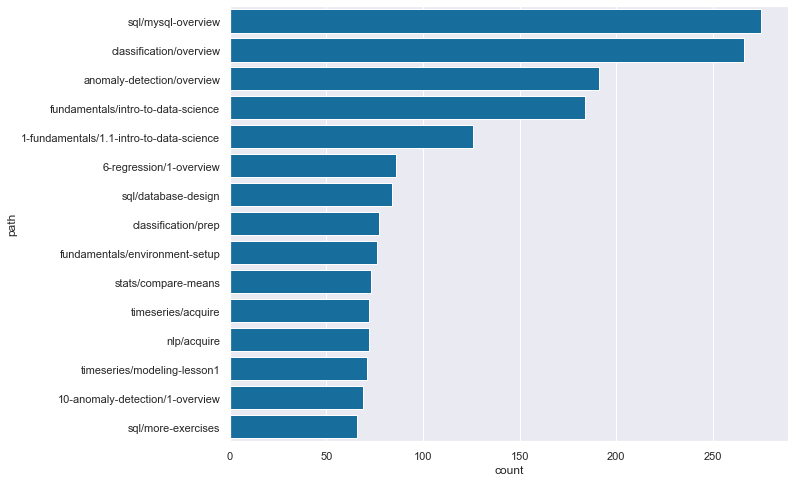

In [26]:
#Top 10 sites
plt.figure(figsize=(10,8))
sns.barplot(y = 'path', x = 'count',data= ds_top_visits.head(15), orient = 'h',color='#0173b2')

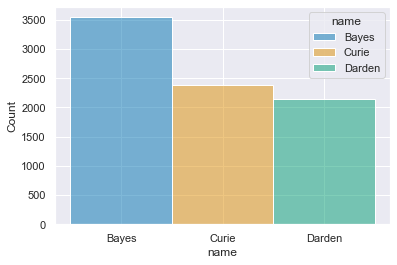

In [27]:
sns.histplot(data=ds_df,x='name',hue='name');

In [28]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8074 entries, 443672 to 900097
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8074 non-null   datetime64[ns]
 1   time            8074 non-null   object        
 2   path            8074 non-null   object        
 3   user_id         8074 non-null   int64         
 4   cohort_id       8074 non-null   float64       
 5   ip              8074 non-null   object        
 6   id              8074 non-null   float64       
 7   name            8074 non-null   object        
 8   slack           8074 non-null   object        
 9   start_date      8074 non-null   datetime64[ns]
 10  end_date        8074 non-null   datetime64[ns]
 11  created_at      8074 non-null   object        
 12  updated_at      8074 non-null   object        
 13  deleted_at      0 non-null      float64       
 14  program_id      8074 non-null   float64       
 1

In [29]:
ds_df.days_post_grad.describe()

count    8074.000000
mean      114.034184
std       118.781792
min         1.000000
25%        24.000000
50%        67.000000
75%       160.000000
max       447.000000
Name: days_post_grad, dtype: float64

In [30]:
ds_df.days_post_grad.value_counts()

21.0     301
7.0      165
6.0      130
13.0     118
17.0     113
        ... 
177.0      1
414.0      1
168.0      1
417.0      1
447.0      1
Name: days_post_grad, Length: 376, dtype: int64

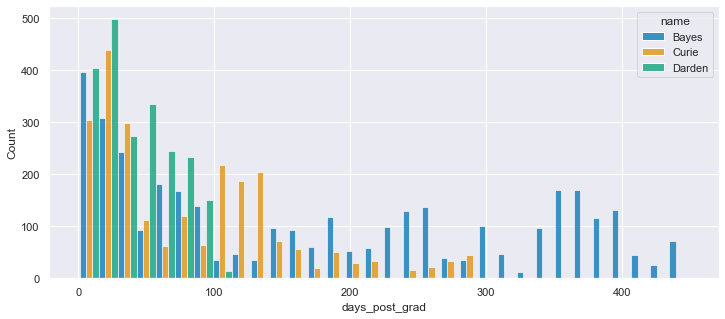

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(data=ds_df, x='days_post_grad',hue='name',multiple='dodge',binwidth=14);

In [32]:
ds_df.path.value_counts()

sql/mysql-overview                          275
classification/overview                     266
anomaly-detection/overview                  191
fundamentals/intro-to-data-science          184
1-fundamentals/1.1-intro-to-data-science    126
                                           ... 
2-storytelling/3.6-creating-stories           1
appendix/testing-code                         1
distributed-ml/read-jdbc                      1
fundamentals/intro-to-data-science.md         1
individual-project/individual-project         1
Name: path, Length: 396, dtype: int64

**DS Post Graduation Visit Summary:**
- 8074 page visits across 3 cohorts. -Not counting images, search, index and landing page
- 

In [33]:
post_graduation_visits = df.path.value_counts()

In [34]:
post_graduation_visits.head(10)

javascript-i     4965
spring           4262
html-css         3678
java-iii         3537
java-ii          3439
java-i           3123
appendix         3071
javascript-ii    2978
mysql            2579
toc              2564
Name: path, dtype: int64

In [35]:
post_graduation_visits.index.str.split(pat='/')

Index([                                                      ['javascript-i'],
                                                                   ['spring'],
                                                                 ['html-css'],
                                                                 ['java-iii'],
                                                                  ['java-ii'],
                                                                   ['java-i'],
                                                                 ['appendix'],
                                                            ['javascript-ii'],
                                                                    ['mysql'],
                                                                      ['toc'],
       ...
                                    ['appendix', 'mock-behavioral-questions'],
                                                           ['capstone', '50'],
                                         

**Question 6 Notes:**
- visits to "/" are just entry points, so we can ignore that


### Question 5
- parse out first section of path
- create 2020+ later >> assume this is clean data
- drop out any columns that match
  - In theory this will be landing pages, shared resources, or duplicate naming conventions

In [36]:
df5 = wrangle.get_curriculum_data()
df5.head()

Returning saved csv files.


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java


In [37]:
#drop any rows w/o a start_date
# df5[df5.start_date is None]
df5.sort_values(by='start_date')

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
900222,2021-04-21,16:44:39,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
449753,2020-02-06,11:41:15,mysql/sample-database,545,28.0,12.106.208.194,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
449754,2020-02-06,11:41:29,java-iii,545,28.0,12.106.208.194,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
449755,2020-02-06,11:41:31,java-iii/jdbc,545,28.0,12.106.208.194,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
449769,2020-02-06,11:43:50,appendix/cli/7-more-topics,11,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2.0,full_stack_java
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program
899898,2021-04-21,12:49:02,javascript-ii/es6,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program
899900,2021-04-21,12:52:37,javascript-ii/promises,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program


In [38]:
#drop staff access
df5 = df5[df5.name != 'Staff']

In [39]:
df5.sort_values(by='start_date')

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name
80901,2018-07-02,09:54:43,jquery/essential-methods/traversing,64,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
96502,2018-08-02,10:34:15,html-css/css-ii/bootstrap-introduction,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
56586,2018-05-16,08:53:20,appendix/extra-challenges/css-practice,64,1.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
164475,2018-12-04,11:05:37,mysql/relationships/indexes,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
164571,2018-12-04,11:55:19,javascript-ii,64,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program
899898,2021-04-21,12:49:02,javascript-ii/es6,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program
899900,2021-04-21,12:52:37,javascript-ii/promises,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown_program


In [40]:
df5 = df5[~df5.name.isna()]

In [41]:
df5.path.str.split(pat='/',n=1,expand=True) 
#bug?  can't grab first column....0 returns all, 1 returns 2
# df5['top_path']

,0,1
0,,
1,java-ii,None
2,java-ii,object-oriented-programming
3,slides,object_oriented_programming
4,javascript-i,conditionals
...,...,...
900210,jquery,personal-site
900211,html-css,css-ii/bootstrap-grid-system
900212,java-iii,None
900213,java-iii,servlets


In [63]:
df5.path.str.split(pat='/',expand=True)

,0,1,2,3,4,5,6
0,,,None,None,None,None,None
1,java-ii,None,None,None,None,None,None
2,java-ii,object-oriented-programming,None,None,None,None,None
3,slides,object_oriented_programming,None,None,None,None,None
4,javascript-i,conditionals,None,None,None,None,None
...,...,...,...,...,...,...,...
900210,jquery,personal-site,None,None,None,None,None
900211,html-css,css-ii,bootstrap-grid-system,None,None,None,None
900212,java-iii,None,None,None,None,None,None
900213,java-iii,servlets,None,None,None,None,None


In [43]:
#get first piece of path and store
df5['path_0'] = df5.path.str.split(pat='/',expand=True).loc[:,0]

In [44]:
df5.path_0.value_counts()

javascript-i                   107537
html-css                        76168
mysql                           73741
jquery                          54084
spring                          49915
                                ...  
console-io                          1
6.01.03_Summarize                   1
4.2-compare-means                   1
curie-statistics-assessment         1
6.03_Explore                        1
Name: path_0, Length: 471, dtype: int64

In [45]:
df5.groupby('path_0').program_name.value_counts()

path_0                         program_name   
                               full_stack_java    29474
                               data_science        8358
                               full_stack_php      1681
                               front_end              1
%20https:                      data_science           1
                                                  ...  
web-dev-day-two                full_stack_java        2
where                          data_science           1
working-with-time-series-data  data_science          14
wp-admin                       full_stack_java        1
wp-login                       full_stack_java        1
Name: program_name, Length: 580, dtype: int64

In [46]:
df5['date'] = pd.to_datetime(df5['date'],format='%Y-%m-%d')

In [47]:
#Get 2020 and later site visits 
#represents 'clean' data - when students couldn't access each other's curriculum
df5_rest = df5[df5.date > '2019-12-31']
print(f'min date: {df5_rest.date.min()}\nmax date: {df5_rest.date.max()}')

min date: 2020-01-01 00:00:00
max date: 2021-04-21 00:00:00


In [48]:
root_paths = pd.DataFrame(df5_rest.path_0.unique()).rename(columns={0:'path_0'}) #261
for cnt,p in enumerate(df.program_name.unique()):
    #create new column name
    col_name = str(p)
    #make subset of root paths accessed by this program
    prog_paths = df5_rest[df5_rest.program_name == p].path_0
    #create column to see if that path was access
    root_paths[col_name] = root_paths.path_0.isin(prog_paths).astype(int)

#create column on whether or not more than one program can access this root path
root_paths['only_one'] = (1 == root_paths.loc[:,'full_stack_php':'data_science'].sum(axis=1))

In [49]:
root_paths[root_paths.only_one]

,path_0,full_stack_php,full_stack_java,front_end,data_science,only_one
9,10-anomaly-detection,0,0,0,1,True
12,9-timeseries,0,0,0,1,True
14,8-clustering,0,0,0,1,True
17,7-classification,0,0,0,1,True
18,11-nlp,0,0,0,1,True
...,...,...,...,...,...,...
229,individual-project,0,0,0,1,True
230,selectors,0,1,0,0,True
231,css,0,1,0,0,True
232,florence-python-assessment.html,0,0,0,1,True


In [50]:
#create dataframe of root paths that only one program has access to
root_paths_rest = root_paths[root_paths.only_one]

In [53]:
cross_access = pd.DataFrame()
#loop over each program
for cnt, p in enumerate(df.program_name.unique()):
    #get entries that don't include that program
    df_not_p = df5[df5.program_name != p]
    #now add any inappropriate access times
    #if the path of any other program, is in that exclusive program's url, then add the line
    subset = df_not_p[df_not_p.path_0.isin(root_paths_rest[root_paths_rest[p] == 1].path_0)]
    cross_access = pd.concat([cross_access,subset])
    
cross_access.drop_duplicates(inplace=True)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,path_0
131966,2018-09-27,21:37:45,uploads/5762c2946250b.jpg,222,25.0,72.190.161.136,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,NaN,2.0,full_stack_java,uploads
220531,2019-03-18,08:40:49,uploads/5762c2946250b.jpg,333,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,NaN,2.0,full_stack_java,uploads
297830,2019-07-12,20:55:36,uploads/598dc43df39e2.jpg,333,29.0,173.173.102.182,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,NaN,2.0,full_stack_java,uploads
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,slides
608,2018-01-27,07:49:25,teams/13,1,8.0,72.177.226.58,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,teams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414518,2019-12-12,16:41:44,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,489,51.0,97.105.19.58,51.0,Deimos,#deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,NaN,2.0,full_stack_java,10-anomaly-detection
421049,2019-12-22,19:44:41,2-storytelling/project,18,22.0,45.20.117.182,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java,2-storytelling
421053,2019-12-22,19:45:06,10-anomaly-detection/1-overview,18,22.0,45.20.117.182,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java,10-anomaly-detection
421054,2019-12-22,19:45:06,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,18,22.0,45.20.117.182,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,full_stack_java,10-anomaly-detection


In [55]:
print(f'The starting date is {cross_access.date.min()}\nThe ending date is {cross_access.date.max()}')

The starting date is 2018-01-26 00:00:00
The ending date is 2019-12-22 00:00:00


<AxesSubplot:xlabel='date', ylabel='Count'>

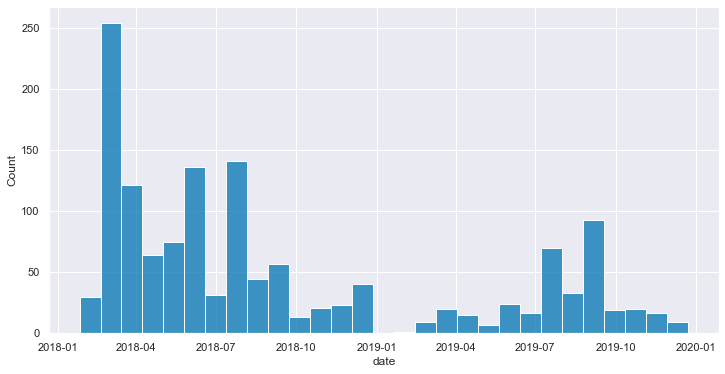

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(data=cross_access,x='date',binwidth=24)

In [71]:
df5_rest.program_name.value_counts()

full_stack_java    306057
data_science        83344
full_stack_php       1712
Name: program_name, dtype: int64

In [76]:
df[df.program_name=='full_stack_php'].sort_values(by='end_date')

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,days_post_grad
115716,2018-08-28,15:40:31,jquery/personal-site,64,1.0,209.92.162.135,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,1589.0
98619,2018-08-06,13:31:14,java-ii/exceptions-and-error-handling,64,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,1567.0
98748,2018-08-06,14:01:39,javascript-i,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,1567.0
98783,2018-08-06,14:11:36,javascript-i/introduction,211,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,1567.0
98807,2018-08-06,14:30:56,toc,64,1.0,97.105.19.58,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,full_stack_php,1567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60093,2018-05-27,13:28:44,slides/console_io,96,19.0,173.173.118.83,19.0,Quincy,#quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,NaN,1.0,full_stack_php,247.0
60092,2018-05-27,13:18:12,java-i/console-io,96,19.0,173.173.118.83,19.0,Quincy,#quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,NaN,1.0,full_stack_php,247.0
371399,2019-10-13,10:51:11,2-storytelling/2.2-create,75,19.0,72.181.104.173,19.0,Quincy,#quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,NaN,1.0,full_stack_php,751.0
60100,2018-05-27,14:25:55,slides/console_io,96,19.0,173.173.118.83,19.0,Quincy,#quincy,2017-06-05,2017-09-22,2017-06-05 20:12:10,2017-06-05 20:12:10,NaN,1.0,full_stack_php,247.0


### Idea Fairies
- Subset into cohort and create activity plot for each cohort (see how activity after graduation varies)